# Spotify

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from pathlib import Path 
import os



In [86]:


df = pd.read_csv("./df_audio_features_10.csv")

df.head()

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...


In [87]:
df["song_name"]

0                                              My Band
1                                  The Real Slim Shady
2                                       Águas De Março
3                                The Girl From Ipanema
4                                      Paint It, Black
5                                     Sultans Of Swing
6             Space Raiders - Charlotte de Witte Remix
7                                           In Silence
8    Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...
9    Nocturne en mi bémol majeur opus 9 n°2: Ballad...
Name: song_name, dtype: object

In [88]:
# i made as blow the groups when i heard 

# 0                                              My Band --- rap-pop

# 1                                  The Real Slim Shady --- rap-pop

# 2                                       Águas De Março --- dance_slow

# 3                                The Girl From Ipanema --- slow

# 4                                      Paint It, Black --- rock_pop

# 5                                     Sultans Of Swing --- clasic_pop

# 6             Space Raiders - Charlotte de Witte Remix --- dj_remix

# 7                                           In Silence --- dj_remix

# 8    Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ... --- ganz_clasic

# 9    Nocturne en mi bémol majeur opus 9 n°2: Ballad... --- ganz_clasic

# K-Means methode

In [89]:
df1 = df[["song_name", "loudness", "acousticness"]]

df1.head(10)

,song_name,loudness,acousticness
0,My Band,-3.383,0.49700
1,The Real Slim Shady,-4.244,0.03020
2,Águas De Março,-15.503,0.85400
3,The Girl From Ipanema,-16.790,0.86700
4,"Paint It, Black",-9.267,0.04930
5,Sultans Of Swing,-10.023,0.06140
6,Space Raiders - Charlotte de Witte Remix,-10.865,0.00314
7,In Silence,-12.017,0.00548
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",-33.503,0.98900
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,-24.698,0.99000


Text(0, 0.5, 'acousticness')

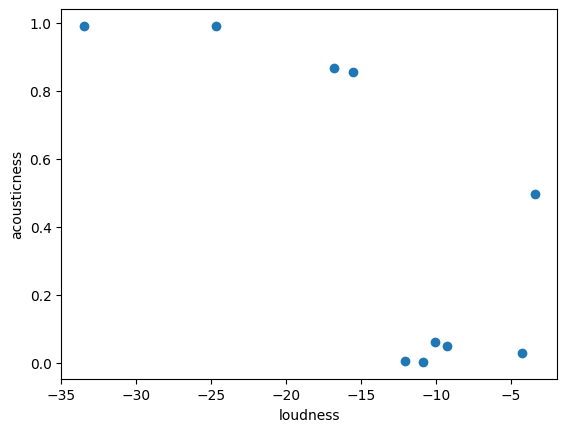

In [115]:
plt.scatter(df[["loudness"]], df[["acousticness"]])
plt.xlabel("loudness")
plt.ylabel("acousticness")


Text(0, 0.5, 'tempo')

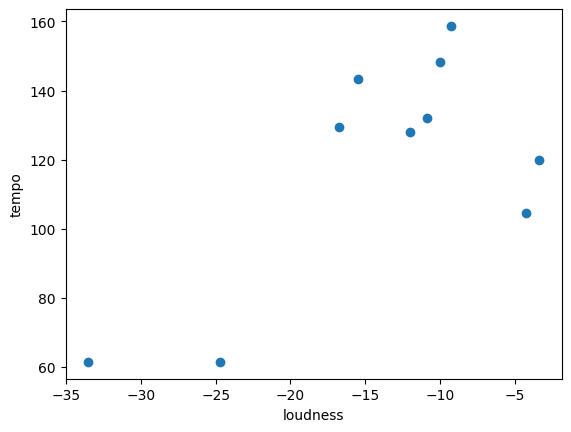

In [116]:
plt.scatter(df[["loudness"]], df[["tempo"]])  # Best duo-columns what i found
plt.xlabel("loudness")
plt.ylabel("tempo")


Text(0, 0.5, 'loudness')

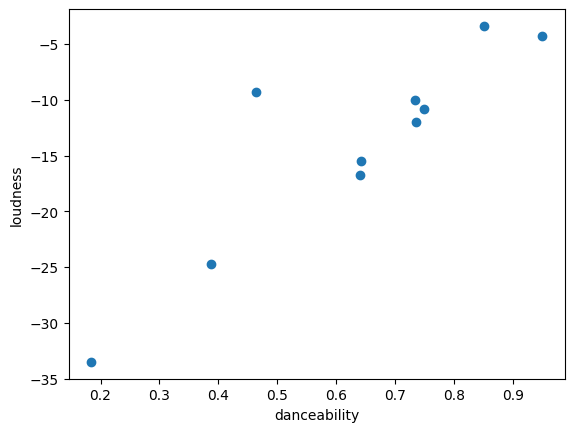

In [113]:
plt.scatter(df[["danceability"]], df[["loudness"]])
plt.xlabel("danceability")
plt.ylabel("loudness")


In [127]:
model = KMeans(n_clusters=5)

y_predicted = model.fit_predict(df[["loudness", "tempo"]])

y_predicted

array([1, 1, 0, 0, 0, 0, 2, 3, 4, 4])

In [102]:
df["cluster"] = y_predicted

df.sort_values("cluster", inplace= True)

df.head()

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.104,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...,0
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.112,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...,0
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.116,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...,1
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.105,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...,1
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.111,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...,1


In [95]:
model.cluster_centers_

array([[ -3.8135    , 112.259     ],
       [-29.1005    ,  61.5175    ],
       [-12.763     , 145.796     ],
       [-13.224     , 129.77466667],
       [ -9.267     , 158.691     ]])

In [96]:
model.inertia_

213.74377016666662

In [97]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]
df4 = df.loc[df.cluster == 3]
df5 = df.loc[df.cluster == 4]


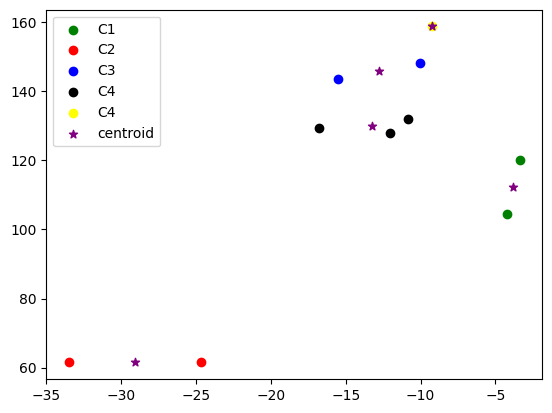

In [100]:
plt.scatter(df1["loudness"], df1[ "tempo"], color = "green", label = "C1")
plt.scatter(df2["loudness"], df2[ "tempo"], color = "red", label = "C2")
plt.scatter(df3["loudness"], df3[ "tempo"], color = "blue", label = "C3")
plt.scatter(df4["loudness"], df4[ "tempo"], color = "black", label = "C4")
plt.scatter(df5["loudness"], df5[ "tempo"], color = "yellow", label = "C4")



plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(df[["loudness"]])
df["loudness"] = scaler.transform(df[["loudness"]])


scaler.fit(df[["tempo"]])
df["tempo"] = scaler.transform(df[["tempo"]])

df[["song_name", "loudness", "tempo"]]

,song_name,loudness,tempo
1,The Real Slim Shady,0.971414,0.442503
0,My Band,1.000000,0.602076
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.000000,0.000484
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,0.292331,0.000000
3,The Girl From Ipanema,0.554880,0.697799
2,Águas De Março,0.597610,0.842866
4,"Paint It, Black",0.804648,1.000000
5,Sultans Of Swing,0.779548,0.891797
6,Space Raiders - Charlotte de Witte Remix,0.751594,0.725362
7,In Silence,0.713347,0.684332


In [138]:
model = KMeans(n_clusters=5)

y_predicted = model.fit_predict(df[["loudness", "tempo"]])

df["cluster"] = y_predicted

y_predicted


array([1, 1, 2, 3, 3, 3, 0, 4, 0, 0])

In [139]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]
df4 = df.loc[df.cluster == 3]
df5 = df.loc[df.cluster == 4]



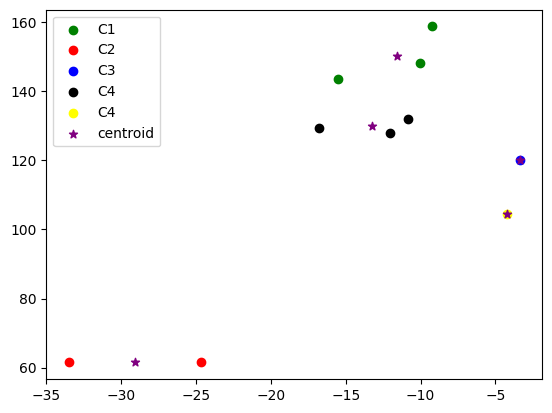

In [140]:
plt.scatter(df1["loudness"], df1[ "tempo"], color = "green", label = "C1")
plt.scatter(df2["loudness"], df2[ "tempo"], color = "red", label = "C2")
plt.scatter(df3["loudness"], df3[ "tempo"], color = "blue", label = "C3")
plt.scatter(df4["loudness"], df4[ "tempo"], color = "black", label = "C4")
plt.scatter(df5["loudness"], df5[ "tempo"], color = "yellow", label = "C4")


plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

# With DBScan

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

In [58]:
model = DBSCAN(eps= 0.2, min_samples= 2)

y_predicted = model.fit_predict(df[["loudness", "tempo"]])


# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)
y_predicted

array([-1, -1,  0,  0,  1,  1,  1,  1,  1,  1], dtype=int64)